In [1]:
import pandas as pd

# Load the CSV files
movies_df = pd.read_csv('C://Users//D.SURESH KUMAR//Desktop//movie_data//movies.csv')
ratings_df = pd.read_csv('C://Users//D.SURESH KUMAR//Desktop//movie_data//ratings.csv')

# Get the shapes of the dataframes
movies_shape = movies_df.shape
ratings_shape = ratings_df.shape

print(f"Shape of movies.csv: {movies_shape}")
print(f"Shape of ratings.csv: {ratings_shape}")


Shape of movies.csv: (9742, 3)
Shape of ratings.csv: (100836, 4)


In [2]:
unique_user_ids = ratings_df['userId'].nunique()
print(f"Number of unique userIds: {unique_user_ids}")


Number of unique userIds: 610


In [3]:
# Group by movieId and count the number of ratings
movie_ratings_count = ratings_df.groupby('movieId').size()

# Merge with movies_df to get movie titles
movie_ratings = movie_ratings_count.reset_index(name='num_ratings')
movie_ratings_with_titles = movie_ratings.merge(movies_df, on='movieId')

# Find the movie with the maximum number of ratings
most_rated_movie = movie_ratings_with_titles.loc[movie_ratings_with_titles['num_ratings'].idxmax()]
print(f"Movie with maximum number of user ratings: {most_rated_movie['title']}")


Movie with maximum number of user ratings: Forrest Gump (1994)


In [4]:
# Assuming a tags dataframe exists
tags_df = pd.read_csv('tags.csv')  # Load your tags dataset

# Get movieId for "Matrix, The (1999)"
matrix_movie_id = movies_df[movies_df['title'] == "Matrix, The (1999)"]['movieId'].values[0]

# Get tags for "Matrix, The (1999)"
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]
print(matrix_tags['tag'].tolist())


['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


In [5]:
# Get movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = movies_df[movies_df['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values[0]

# Calculate the average rating
average_rating = ratings_df[ratings_df['movieId'] == terminator_movie_id]['rating'].mean()
print(f"Average user rating for Terminator 2: Judgment Day (1991): {average_rating}")


Average user rating for Terminator 2: Judgment Day (1991): 3.970982142857143


C:\Users\D.SURESH KUMAR\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\D.SURESH KUMAR\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


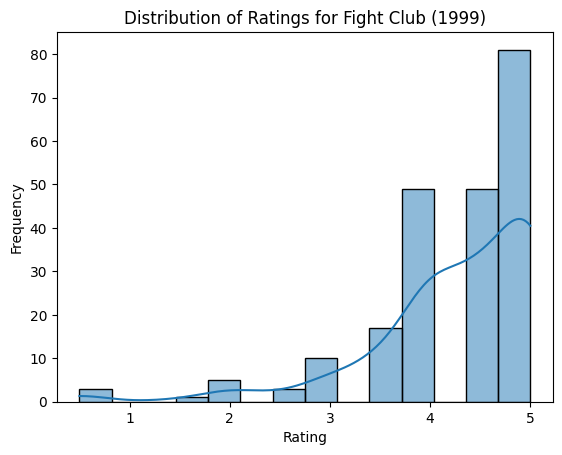

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get movieId for "Fight Club (1999)"
fight_club_movie_id = movies_df[movies_df['title'] == "Fight Club (1999)"]['movieId'].values[0]

# Plot the distribution of ratings
ratings_fight_club = ratings_df[ratings_df['movieId'] == fight_club_movie_id]['rating']
sns.histplot(ratings_fight_club, kde=True)
plt.title("Distribution of Ratings for Fight Club (1999)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [7]:
# Group by movieId and calculate count and mean
movie_ratings_summary = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})
movie_ratings_summary.columns = ['num_ratings', 'average_rating']
movie_ratings_summary.reset_index(inplace=True)

# Merge with movies_df
movies_ratings_summary = movie_ratings_summary.merge(movies_df, on='movieId')

# Filter movies with more than 50 ratings
popular_movies = movies_ratings_summary[movies_ratings_summary['num_ratings'] > 50]


In [8]:
# Find the movie with the highest average rating
most_popular_movie = popular_movies.loc[popular_movies['average_rating'].idxmax()]
print(f"Most popular movie based on average user ratings: {most_popular_movie['title']}")


Most popular movie based on average user ratings: Shawshank Redemption, The (1994)


In [9]:
# Get top 5 movies based on number of ratings
top_5_popular_movies = popular_movies.sort_values(by='num_ratings', ascending=False).head(5)
print("Top 5 popular movies based on number of user ratings:")
print(top_5_popular_movies[['title', 'num_ratings']])


Top 5 popular movies based on number of user ratings:
                                 title  num_ratings
314                Forrest Gump (1994)          329
277   Shawshank Redemption, The (1994)          317
257                Pulp Fiction (1994)          307
510   Silence of the Lambs, The (1991)          279
1938                Matrix, The (1999)          278


In [10]:
# Filter Sci-Fi movies
sci_fi_movies = popular_movies[popular_movies['genres'].str.contains('Sci-Fi')]

# Find the third most popular Sci-Fi movie
third_most_popular_sci_fi = sci_fi_movies.sort_values(by='num_ratings', ascending=False).iloc[2]
print(f"Third most popular Sci-Fi movie: {third_most_popular_sci_fi['title']}")


Third most popular Sci-Fi movie: Jurassic Park (1993)
